In [ ]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,656 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

#Les fichiers
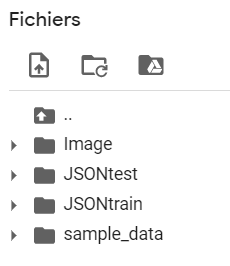

Image contient les images qui se trouvent ici : https://expressexpense.com/blog/free-receipt-images-ocr-machine-learning-dataset/

JSONtest contient les fichiers JSON de la base de donnée test
JSONtrain contient les fichiers JSON de la base de donnée train

La base de donnée : https://drive.google.com/drive/folders/1_r2rgPKBqqFmEFoNvz2lQGfIIfRALJ_W


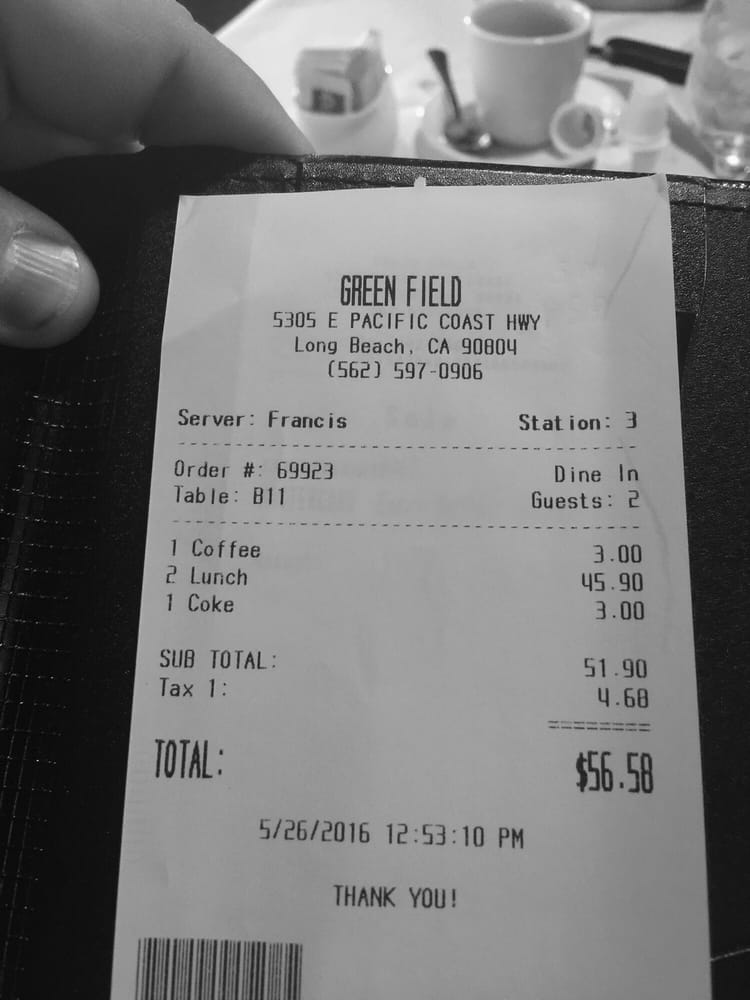

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/Image/1000-receipt.jpg', 0)

cv2_imshow(image)

# Test d'un préprocessing afin de rendre l'image plus facile à analyser
A éviter car l'algorithme à plus de mal à lire et en plus les paramètres optimaux du processing dépendent de l'image de départ

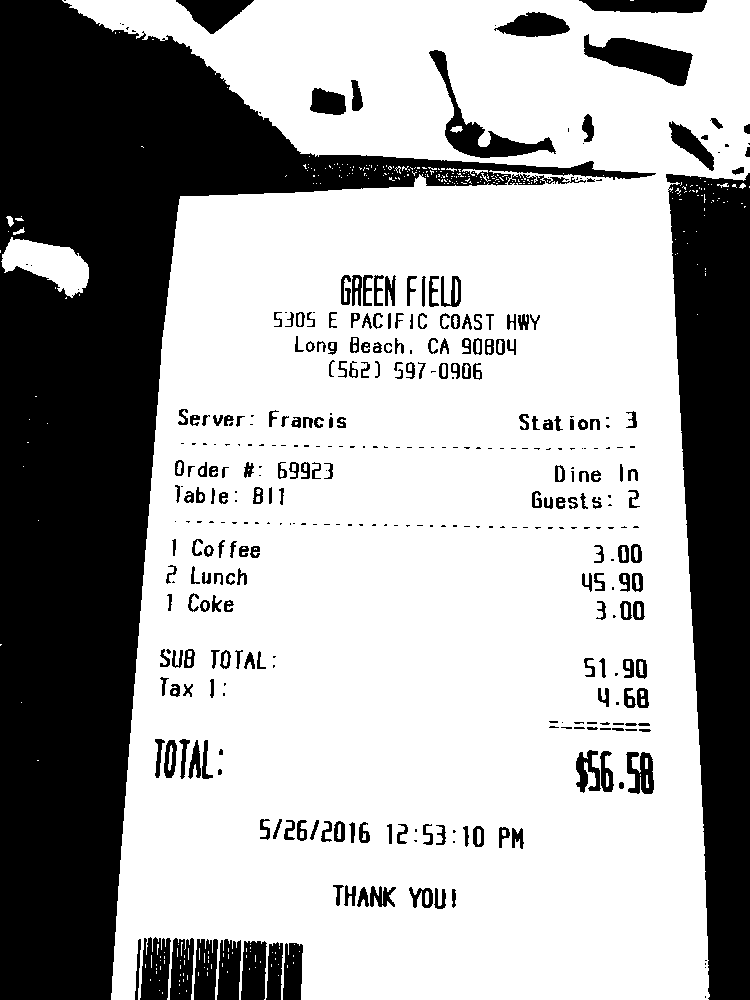

In [ ]:
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY) #Faire varier le 2ème argument suivant le contraste

thresh1 = 255 - thresh1

cv2_imshow(thresh1)

In [ ]:
import pytesseract
from pytesseract import Output

# Résultat avec préprocessing


    
  
  
  

GREEN FIELD
5305 E PACIFIC COAST HWY
Long Beach, CA 90804
(562) 597-0906

Server: Francis Station: 3

Order #: 69923

Dine In

Table: BIT Guests: &

| Coffee 3.00

2 Lunch 4s .90
1 Coke 3.00
SUB TOTAL: 51.90
Tax |: 4.68

TOTAL: $6.58

5/26/2016 12:53:10 PM

eeeaeia

THANK YOU!



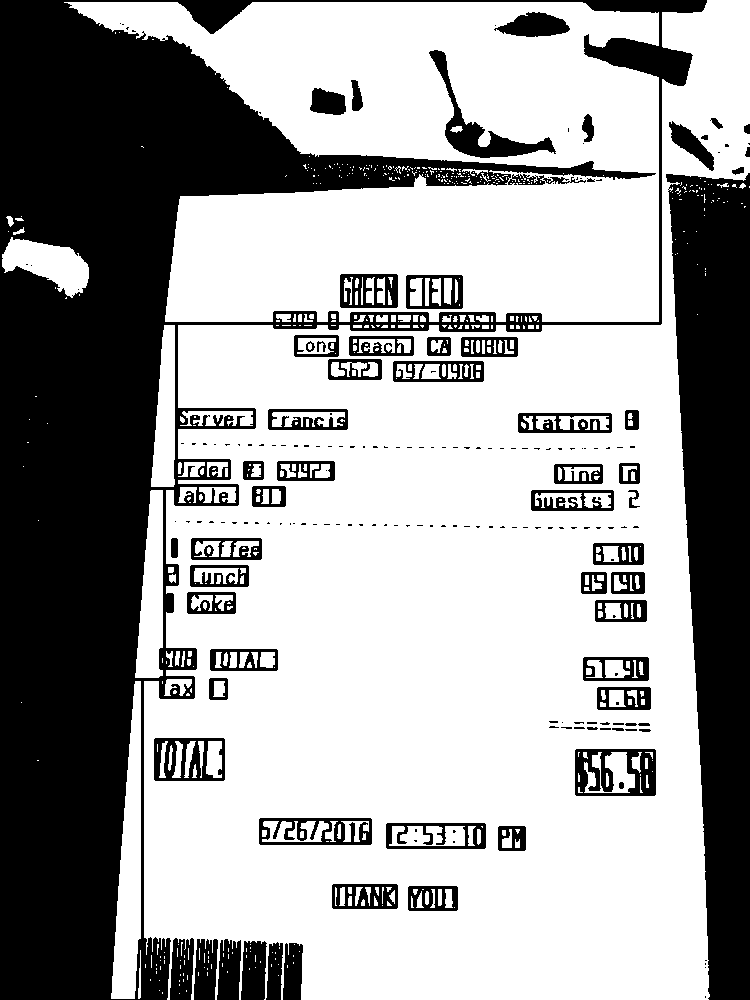

In [ ]:
details = pytesseract.image_to_data(thresh1, output_type=Output.DICT)

text = pytesseract.image_to_string(thresh1)

print(text) # Au dessus de l'image c'est ce que lit le programme

total_boxes = len(details['text'])

for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >30:
    (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
    threshold_img = cv2.rectangle(thresh1, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(threshold_img) #L'image avec ses blocs de lecture

# Résultat sans préprocessing

    
  
  
  

GREEN FIELD
5305 E PACIFIC COAST HWY
Long Beach, CA 90804
(S62) 597-0906

Server: Francis Station: 4
Order #: 69923 Dine In
Table: B11 Guests: 2
1 Coffee 3.00
2 Lunch 45.90
1 Coke 3.00
SUB TOTAL: 51.90
Tax 1:

TOTAL: $56.58

5/26/2016 12:53:10 PM

INAH

THANK YOU!

 



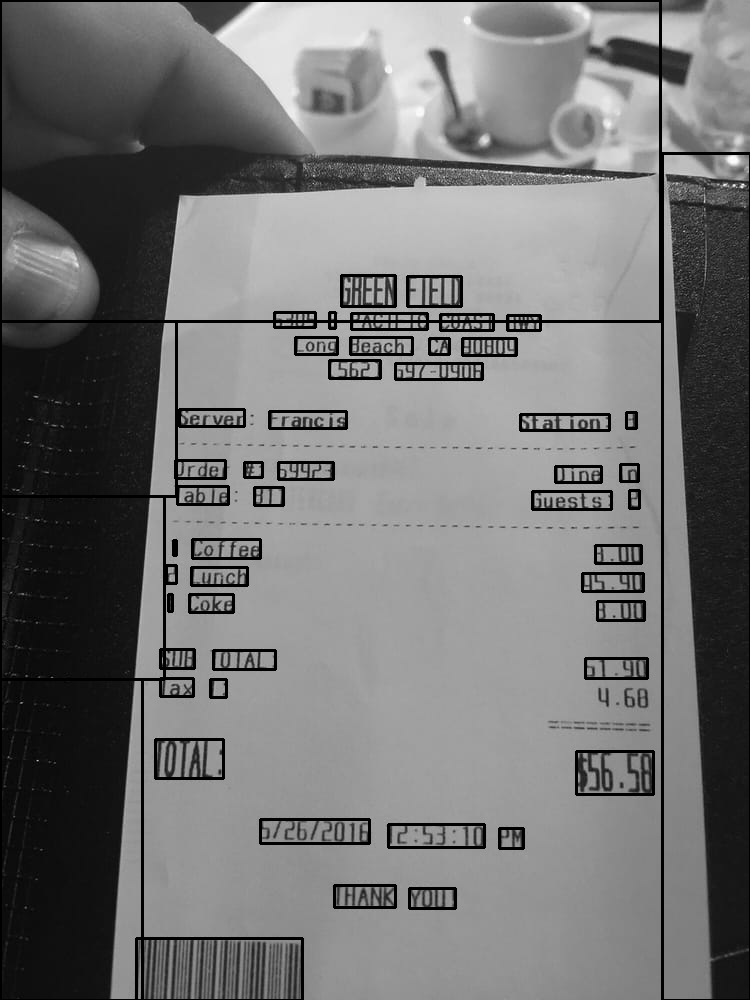

In [ ]:
details = pytesseract.image_to_data(image, output_type=Output.DICT)
text = pytesseract.image_to_string(image, output_type=Output.DICT)

print(text['text'])
mots=0
total_boxes = len(details['text'])

for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >-0.5: # conf : un indice de confiance, (après test) seuil très bas pour éviter de manquer des informations
    (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    mots+=1

cv2_imshow(image)


# Transformation de l'image en tableau
Méthode personnelle, on compte le nombre de ligne qu'il faut, ainsi que la ligne avec le plus de mots, ce qui donnera le nombre de colonne

In [ ]:
print("Nombre de mots :", mots)
lignes = text['text'].count("\n")
print("Nombre de lignes :", lignes)
maxmot = max(details['word_num'])
print("Nombre maximum de mot sur une ligne :", maxmot)

Tableau=[]
MotLigne = 0
NbLigne = 0
UneLigne = [""]*maxmot
FinLigne = True

for i in range(len(details['word_num'])):
  if details['word_num'][i] != 0:
    UneLigne[MotLigne] = details['text'][i]
    MotLigne+=1
    FinLigne = False
  if details['word_num'][i] == 0 and FinLigne == False:
    MotLigne = 0
    FinLigne = True
    Tableau.append(UneLigne)
    for j in range(maxmot):
      Tableau[NbLigne][j] = UneLigne[j]
    NbLigne += 1
    UneLigne = [""]*maxmot

print("\nL'image transformée en tableau :\n")
for i in range(len(Tableau)):
  print(Tableau[i])

Nombre de mots : 53
Nombre de lignes : 28
Nombre maximum de mot sur une ligne : 5

L'image transformée en tableau :

['    ', '', '', '', '']
['  ', '', '', '', '']
['  ', '', '', '', '']
['  ', '', '', '', '']
['GREEN', 'FIELD', '', '', '']
['5305', 'E', 'PACIFIC', 'COAST', 'HWY']
['Long', 'Beach,', 'CA', '90804', '']
['(S62)', '597-0906', '', '', '']
['Server:', 'Francis', 'Station:', '4', '']
['Order', '#:', '69923', 'Dine', 'In']
['Table:', 'B11', 'Guests:', '2', '']
['1', 'Coffee', '3.00', '', '']
['2', 'Lunch', '45.90', '', '']
['1', 'Coke', '3.00', '', '']
['SUB', 'TOTAL:', '51.90', '', '']
['Tax', '1:', '', '', '']
['TOTAL:', '$56.58', '', '', '']
['5/26/2016', '12:53:10', 'PM', '', '']
['INAH', '', '', '', '']
['THANK', 'YOU!', '', '', '']


#Créer un tableau suivant l'article de recherche
Ici on cherche les coordonnées de chaque mot

In [ ]:
ListeMot = []
LigneTableau = 20
ColonneTableau = 20

height, width = image.shape

for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >-0.5: # conf : un indice de confiance, (après test) seuil très bas pour éviter de manquer des informations
    DonneeMot=[]
    DonneeMot.append(details['text'][sequence_number])
    Colonne_x_i = ColonneTableau*(details['left'][sequence_number]+details['width'][sequence_number])/width
    Ligne_y_i = LigneTableau*(details['top'][sequence_number]+details['height'][sequence_number])/height
   
    DonneeMot.append(round(Ligne_y_i)-1)
    DonneeMot.append(round(Colonne_x_i)-1)

    ListeMot.append(DonneeMot)

#ListeMot est une liste qui contient tous les mots ainsi que leur ligne et colonne associée dans le tableau

print(ListeMot[i])


['Station:', 8, 15]


Ici on place les mots dans un tableau

In [ ]:
TableauRecherche=[]
for i in range(LigneTableau):
  TableauRecherche.append([""]*ColonneTableau)

#Construction Ligne par Ligne

for element in ListeMot:
  TableauRecherche[element[1]][element[2]]=element[0]

for i in TableauRecherche:
  print(i)
  

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', 'GREEN', 'FIELD', '', '', '', '', '', '    ', '', '']
['', '', '', '', '', '', '', '5305', 'Long', '', 'Beach,', 'CA', 'COAST', '90804', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '(S62)', '', '', '597-0906', '', '', '', '', '', '', '']
['', '', '', '', '', '', 'Server:', '', 'Francis', '', '', '', '', '', '', 'Station:', '4', '', '', '']
['', '', '', '', '  ', 'Table:', '#:', 'B11', '69923', '', '', '', '', '', '', 'Guests:', '2', '', '', '']
['', '', '', '', '1', '', 'Coffee', '', '', '', '', '', '', '', '', '', '3.00', '', '', 

Visualisation d'un fichier JSON

In [ ]:
import json

with open('/content/JSONtrain/receipt_00001.json') as json_data:
    data_dict = json.load(json_data)

for i in range(len(data_dict['valid_line'])):
  for j in range(len(data_dict['valid_line'][i]['words'])):
    print(data_dict['valid_line'][i]['words'][j]['text'])

1
SPGTHY
BOLOGNASE
58,000
1
PEPPER
AUS
165,000
WELL
DONE
1
WAGYU
RIBEYE
195,000
MEDIUM
WELL
1
ICED
LEMON
TEA
22,000
1
FUSION
TEA
LYCHE
28,000
1
NUTTELA
BROWNIES
35,000
SUBTOTAL
503,000
52,815
PB1
SVC
CHRG
25,150
DUE
580,965


#Transformer un fichier JSON en tableau
Ici je travaille directement avec le fichier JSON pour m'assurer que les erreurs lors de l'entrainement ne viennent pas de l'OCR

Les tableaux seront de taille 15x15

In [ ]:
def JSON_to_Tableau(chemin):
  ListeMot = []
  LigneTableau = 15
  ColonneTableau = 15
  Target = 0 # Numéro de ligne de ce qu'on cherche 

  with open(chemin) as json_data:
    data_dict = json.load(json_data)
  height = data_dict['meta']['image_size']['height']
  width = data_dict['meta']['image_size']['width']

  for i in range(len(data_dict['valid_line'])):
    for j in range(len(data_dict['valid_line'][i]['words'])):
      DonneeMot=[]
      DonneeMot.append(data_dict['valid_line'][i]['words'][j]['text'])
      Colonne_x_i = ColonneTableau*(data_dict['valid_line'][i]['words'][j]['quad']['x4']+(data_dict['valid_line'][i]['words'][j]['quad']['x2']-data_dict['valid_line'][i]['words'][j]['quad']['x4']))/width
      Ligne_y_i = LigneTableau*(data_dict['valid_line'][i]['words'][j]['quad']['y4']+(data_dict['valid_line'][i]['words'][j]['quad']['y2']-data_dict['valid_line'][i]['words'][j]['quad']['y4']))/height

      DonneeMot.append(round(Ligne_y_i)-1)
      DonneeMot.append(round(Colonne_x_i)-1)

      ListeMot.append(DonneeMot)

      if data_dict['valid_line'][i]['category'] == 'total.total_price':
        Target = DonneeMot[1]

  TableauRecherche=[]
  for i in range(LigneTableau):
    TableauRecherche.append([""]*ColonneTableau)

  #Construction Ligne par Ligne

  for element in ListeMot:
    TableauRecherche[element[1]][element[2]]=element[0]

  # Tranformation de la target en tableau

  Cible = [ 1 if i==Target else 0 for i in range(LigneTableau)]

  return TableauRecherche, Cible

Exemple = JSON_to_Tableau('/content/JSONtrain/receipt_00001.json')

for i in range(len(Exemple[0])):
  print(Exemple[0][i])

print(Exemple[1])


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['1', '', '', 'PEPPER', '', 'AUS', '', 'BOLOGNASE', '', '', '165,000', '', '', '', '']
['1', '', '', 'WAGYU', '', 'DONE', 'RIBEYE', '', '', '', '195,000', '', '', '', '']
['1', '', '', 'ICED', 'MEDIUM', 'LEMON', 'TEA', '', '', '', '22,000', '', '', '', '']
['1', '', '', '', 'NUTTELA', 'TEA', '', 'BROWNIES', '', '', '35,000', '', '', '', '']
['1', '', '', '', '', '', '', '', '', '', '503,000', '', '', '', '']
['', '', 'PB1', '', 'SUBTOTAL', '', '', '', '', '', '25,150', '', '', '', '']
['', '', 'SVC', 'DUE', 'CHRG', '', '', '', '', '', '580,965', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', 

#Création des ensembles de test et d'entrainement

In [ ]:
import os
x_test = []
y_test = []
for element in os.listdir('/content/JSONtest'):
  XY = JSON_to_Tableau('/content/JSONtest/'+element)
  x_test.append(XY[0])
  y_test.append(XY[1])

In [ ]:
x_train = []
y_train = []
for element in os.listdir('/content/JSONtrain'):
  XY = JSON_to_Tableau('/content/JSONtrain/'+element)
  x_train.append(XY[0])
  y_train.append(XY[1])

#Transformation des caractères en nombres

In [ ]:
Tokentrain = x_train#.tolist()
Tokentest = x_test#.tolist()

from tensorflow.keras.preprocessing.text import Tokenizer

GrandJeton = []

for i in range(len(Tokentrain)):
  GrandJeton += Tokentrain[i]
for i in range(len(Tokentest)):
  GrandJeton += Tokentest[i]

tokenizer = Tokenizer(num_words = 100000)
tokenizer.fit_on_texts(GrandJeton)
word_index = tokenizer.word_index
print(word_index)

for i in range(len(x_train)):
  x_train[i] = tokenizer.texts_to_sequences(Tokentrain[i])

for i in range(len(x_test)):
  x_test[i] = tokenizer.texts_to_sequences(Tokentest[i])

NbToken = len(word_index)

{'': 1, '1': 2, 'total': 3, 'cash': 4, '0': 5, 'change': 6, 'subtotal': 7, '2': 8, 'tax': 9, 'tea': 10, 'sub': 11, '20,000': 12, 'pb1': 13, '10%': 14, '3': 15, '1x': 16, 'x1': 17, '50,000': 18, 'kembali': 19, '17,000': 20, 'change:': 21, '22.000': 22, 'item': 23, 'cheese': 24, 'tunai': 25, '28,000': 26, 'grand': 27, 'discount': 28, 'ice': 29, 'changed': 30, '100,000': 31, 'total:': 32, '12,000': 33, '30.000': 34, '20.000': 35, 'item:': 36, 'rp': 37, '10,000': 38, 'service': 39, '25.000': 40, 'chicken': 41, 'total.': 42, 'kembalian': 43, 'bread': 44, 'due': 45, 'choco': 46, '25,000': 47, '30,000': 48, 'card': 49, '4': 50, 'nasi': 51, 'disc': 52, 'charge': 53, 'teh': 54, 'grand total': 55, '50.000': 56, 'iced': 57, '22,000': 58, 'pb1:': 59, 'es': 60, 'bca': 61, 'ayam': 62, '%': 63, 'qty': 64, 'subtotal:': 65, '40,000': 66, '5': 67, '15000': 68, 'rp.': 69, 'items': 70, 'debit': 71, 'pajak': 72, '8,000': 73, 'mineral': 74, '24,000': 75, '6': 76, 'amount': 77, 'rounding': 78, '2x': 79, 'gor

In [ ]:
import tensorflow as tf
from keras import backend as K
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Les mots les plus fréquents auront un poids plus grand

x_train = NbToken - x_train
x_test = NbToken - x_test

In [ ]:
x_train=np.where(x_train==NbToken-1, 0, x_train) # les espaces vides deviennent des zéros 
x_test=np.where(x_test==NbToken-1, 0, x_test)

print(x_train[0])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 3521    0    0 3035    0 2659    0    0    0    0 3184    0    0
     0]
 [   0    0    0    0    0 3516    0    0    0    0    0 3184    0    0
     0]
 [   0    0    0 3519    0    0    0    0    0    0    0 3511    0    0
     0]
 [   0    0    0    0 3517    0    0    0    0    0    0 3116    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 3520    0 3459    0 3521    0 350

In [ ]:
# Utilisé pour une autre méthode
x2_test = []
y2_test = []
x2_train = []
y2_train = []

for i in range(len(x_train)):
  for j in range(15):
    x2_train.append(x_train[i][j])
    y2_train.append(y_train[i][j])

for i in range(len(x_test)):
  for j in range(15):
    x2_test.append(x_test[i][j])
    y2_test.append(y_test[i][j])

In [ ]:
# Redimension pour rentrer dans le réseau

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 15, 15)
    x_test = x_test.reshape(x_test.shape[0], 1, 15, 15)
    input_shape = (1, 15, 15)
else:
    x_train = x_train.reshape(x_train.shape[0], 15, 15, 1)
    x_test = x_test.reshape(x_test.shape[0], 15, 15, 1)
    input_shape = (15, 15, 1)

#Modèle de l'article de recherche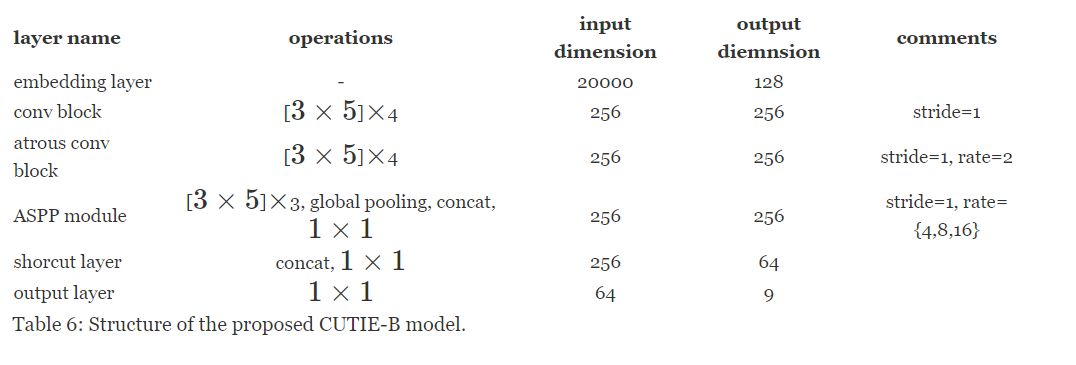

In [ ]:
# Je ne sais pas utiliser la couche "Embedding" qui est la plus importante

model2 = Sequential()

model2.add(layers.Embedding(20000, 128))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
Total params: 2,560,000
Trainable params: 2,560,000
Non-trainable params: 0
_________________________________________________________________


#Modèle pas du tout adapté
Mais avec 25% de précision environs

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

model.summary()   

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               295040    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=30, verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print("perte :",score[0],"précision :",score[1])

perte : 38.9716682434082 précision : 0.3700000047683716


#J'essaye une autre méthode
On regarde la fréquence des mots dans la ligne qui nous intéresse

In [ ]:
Frequenceur = []

for i in range(len(x2_train)):
  if y2_train[i] == 1:
    for j in x2_train[i]:
      if j != 0:
        Frequenceur.append(j)

Dictionnaire = {}

for i in Frequenceur:
  if i in Dictionnaire:
    Dictionnaire[i] += 1
  else:
    Dictionnaire[i] = 1

Pour chaque ligne de x_test on attribue un score en fonction de sa ressemblance avec le dictionnaire


In [ ]:
estimateurTotal = []

for k in range(int(len(x2_test)/15)):
  estimateur = []
  for i in range(15):
    Score = 0
    for j in x2_test[k*15+i]:
      if j in Dictionnaire:
        Score += Dictionnaire[j]
    estimateur.append(Score)
  estimateurTotal.append(estimateur)

estimateurTotal[0]

[0, 0, 0, 0, 0, 0, 0, 3, 16, 109, 0, 0, 0, 0, 0]

In [ ]:
BonneRep = 0
for i in range(len(y_test)):
  if np.argmax(y_test[i]) == np.argmax(estimateurTotal[i]):
    BonneRep += 1

print("Nomre de bonnes réponses :", BonneRep)
print("Ratio :",BonneRep/len(y_test))

Nomre de bonnes réponses : 58
Ratio : 0.58


#Testons sur une image

Pulled Pork Sand
*Reg
Creamed Corn{Small]
Mac & Cheese[sm]
Cake[Slice]
oda

Subtotal
CA Sales Tax

Total
Wells Fargo

Change

Thank You for Visiting

Please visit our website
www. smokecitymarket.com

Enjoy our BBQ? 'Like' us on
facebook and Yelp
Please rate us on Zagat
WW .Zagat com/r/smoke-city-market-van-nuy

 



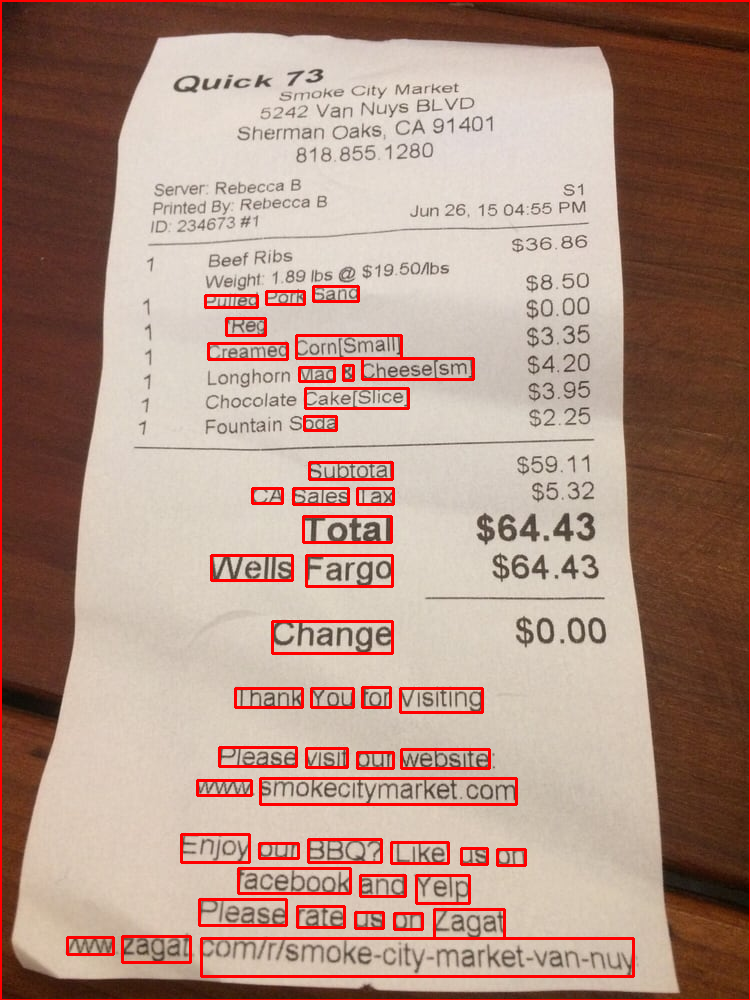

In [ ]:
imagefin = cv2.imread('/content/Image/1011-receipt.jpg')

detailsfin = pytesseract.image_to_data(imagefin, output_type=Output.DICT)
textfin = pytesseract.image_to_string(imagefin, output_type=Output.DICT)

print(textfin['text'])
total_boxesfin = len(detailsfin['text'])

for sequence_number in range(total_boxesfin):
  if int(detailsfin['conf'][sequence_number]) >-0.5: # conf : un indice de confiance, (après test) seuil très bas pour éviter de manquer des informations
    (x, y, w, h) = (detailsfin['left'][sequence_number], detailsfin['top'][sequence_number], detailsfin['width'][sequence_number],  detailsfin['height'][sequence_number])
    imagefin2 = cv2.rectangle(imagefin, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(imagefin2)

In [ ]:
ListeMotfin = []
LigneTableau = 15
ColonneTableau = 15

height, width, _ = imagefin.shape

for sequence_number in range(total_boxesfin):
  if int(detailsfin['conf'][sequence_number]) >-0.5: # conf : un indice de confiance, (après test) seuil très bas pour éviter de manquer des informations
    DonneeMot=[]
    DonneeMot.append(detailsfin['text'][sequence_number])
    Colonne_x_i = ColonneTableau*(detailsfin['left'][sequence_number]+detailsfin['width'][sequence_number])/width
    Ligne_y_i = LigneTableau*(detailsfin['top'][sequence_number]+detailsfin['height'][sequence_number])/height
   
    DonneeMot.append(round(Ligne_y_i)-1)
    DonneeMot.append(round(Colonne_x_i)-1)

    ListeMotfin.append(DonneeMot)


In [ ]:
TableauRecherchefin=[]

for i in range(LigneTableau):
  TableauRecherchefin.append([""]*ColonneTableau)

#Construction Ligne par Ligne

for element in ListeMotfin:
  TableauRecherchefin[element[1]][element[2]]=element[0]

for i in TableauRecherchefin:
  print(i)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '*Reg', 'Creamed', 'Sand', 'Corn{Small]', '', '', '', '', '', '', '']
['', '', '', '', '', '', 'oda', 'Cake[Slice]', 'Cheese[sm]', '', '', '', '', '', '']
['', '', '', '', '', '', '', 'Subtotal', '', '', '', '', '', '', '']
['', '', '', '', '', 'CA', 'Sales', 'Total', '', '', '', '', '', '', '']
['', '', '', '', '', 'Wells', '', 'Fargo', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', 'Change', '', '', '', '', '', '', '']
['', '', '', '', '', 'Please', 'You', 'for', '', 'Visiting', '', '', '', '', '']
['', '', '', '', 'www.', '', 'visit', 'our', '', 'smokecitymarket.com', '', '', '', '', '']
['', '', '', '', 'Enjoy', 'our', 'facebook', 'and', "'Like'", 'on', '', '', '', '', '']
['', 'WW', '', '.Zagat', '', 'Please', 'rat

In [ ]:
TableauRecherchefin = tokenizer.texts_to_sequences(TableauRecherchefin)

for i in range(15):
  for j in range(15):
    try:
      a = TableauRecherchefin[i][j]
    except:
      TableauRecherchefin[i].append(1)


TableauRecherchefin

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 2723, 177, 3, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1791, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 794, 1995, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1995, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [ ]:
TableauRecherchefin = np.array(TableauRecherchefin)

TableauRecherchefin = NbToken - TableauRecherchefin

TableauRecherchefin = np.where(TableauRecherchefin==NbToken-1, 0, TableauRecherchefin)

In [ ]:
  estimateur = []
  for i in range(15):
    Score = 0
    for j in TableauRecherchefin[i]:
      if j in Dictionnaire:
        Score += Dictionnaire[j]
    estimateur.append(Score)

  print("Le total est à la ligne :" ,np.argmax(estimateur)+1)


Le total est à la ligne : 8


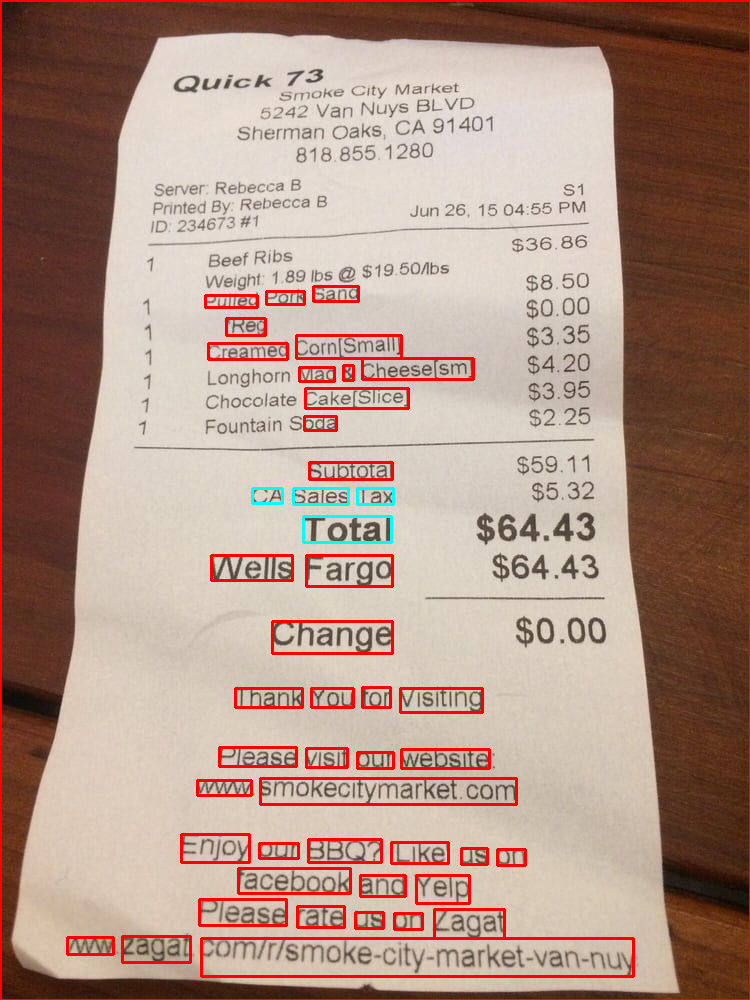

In [ ]:
for sequence_number in range(total_boxesfin):
  if int(detailsfin['conf'][sequence_number]) >-0.5: # conf : un indice de confiance, (après test) seuil très bas pour éviter de manquer des informations
    if np.argmax(estimateur) == round(LigneTableau*(detailsfin['top'][sequence_number]+detailsfin['height'][sequence_number])/height)-1:
      (x, y, w, h) = (detailsfin['left'][sequence_number], detailsfin['top'][sequence_number], detailsfin['width'][sequence_number],  detailsfin['height'][sequence_number])
      imagefin3 = cv2.rectangle(imagefin, (x, y), (x + w, y + h), (255, 255, 0), 2)

try :
  cv2_imshow(imagefin3)
except :
  print("Echec...")